In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv('models.csv')
df.head()
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
# # ds = pd.DataFrame(ct.fit_transform(dataset))
# datatrain = dataset.iloc[:, [4, 8]]
# datavalid = dataset.iloc[:, [5, 9]]
# datatest  = dataset.iloc[:, [6, 10]]

,Model,Train,Val,Test,TrainF1,ValF1,TestF1
0,yolo-v4-55-21042022,13134,1638,1638,0.653739,1.000000,0.527321
1,yolo-v4-56-20042022,16384,2043,2043,0.693137,0.548834,0.533615
2,yolo-v4-57-21042022,10269,1281,1281,0.699644,0.587226,0.578592
3,yolo-v4-58-21042022,15063,1878,1878,0.647077,0.528178,0.536232
4,yolo-v4-59-23042022,14245,1776,1776,0.646387,0.542936,0.542185


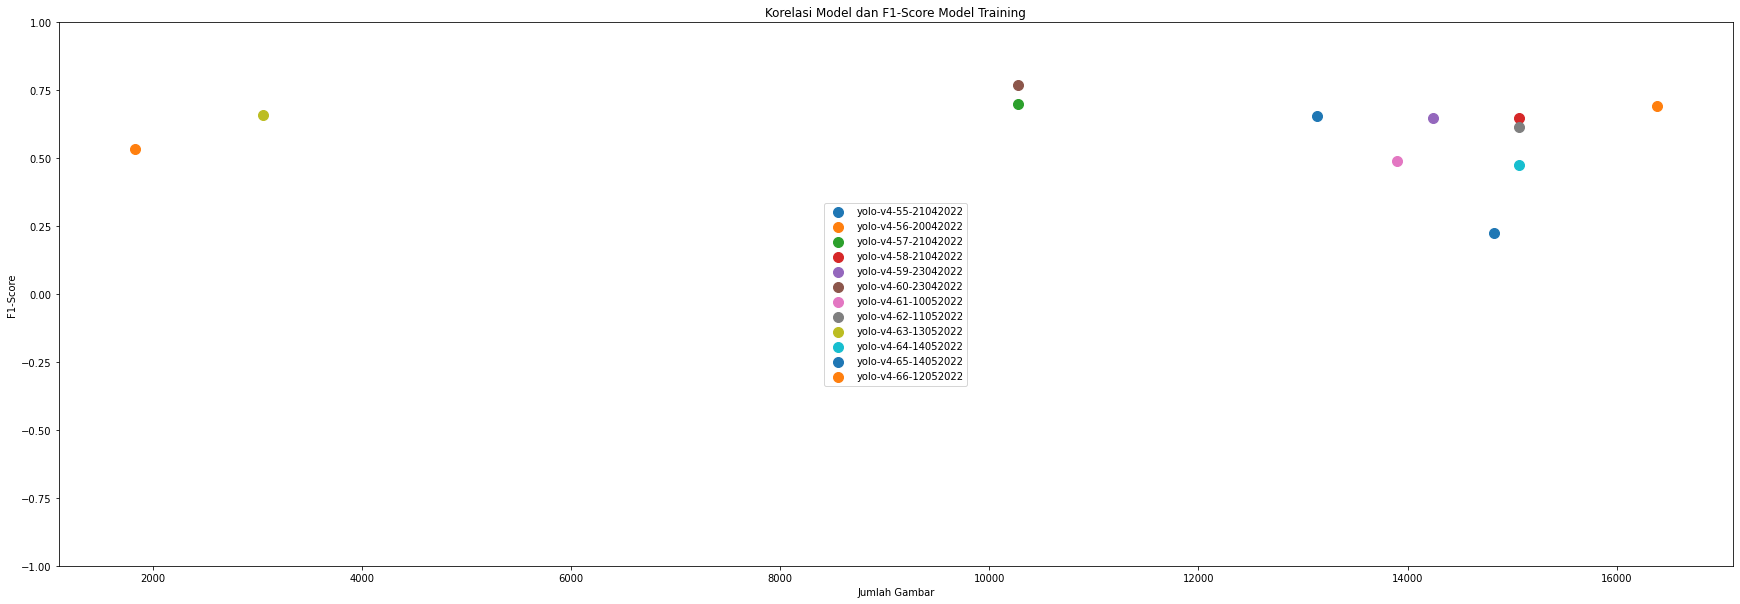

In [59]:
models = np.array(np.unique(df.Model).tolist())
df_features = df[['Model', 'Train', 'TrainF1']]
y_set = np.array(df_features[['TrainF1']])
x_set = np.array(df_features[['Train']])
label = np.array(df_features[['Model']])
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['figure.facecolor']='white'
# print(x_set)
# print(y_set)
# for i in label:
# X_axis = np.arange(len(models))
for x, y in zip(x_set, y_set):
    plt.scatter(x, y, s=100)
#     # print(x, y, i)
#     plt.bar(X_axis - 0.2, y, 0.4, label = 'F1')
#     plt.bar(X_axis + 0.2, x, 0.4, label = 'Gambar')
#     # plt.bar(models, x, 0.4, label=label[i])
#     # plt.bar(models, y, 0.4, label=label[i])
plt.ylim(-1, 1)
plt.title(f'Korelasi Model dan F1-Score Model Training')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(models, loc='center')
plt.savefig(f'modelf1_train.png')
plt.show()

In [ ]:
df_train = df[['No Label', 'Labels', 'Dataset',  'Train_Images', 'Model', 'Train_F1']]
df_train_sorted = df_train.sort_values('Train_F1')
df_train_sorted.corr()

In [ ]:
X_df_train_rel = df_train_sorted[['Train_Images', 'Labels']]
X_df_train_imgs = np.asarray(X_df_train_rel[['Train_Images']])
X_df_train_imgs.reshape(-1, 1)

y_df_train_rel = df_train_sorted[['Model', 'Train_F1']]
y_df_train_f1 = np.asarray(y_df_train_rel[['Train_F1']])

# print(y_df_train_f1[0], y_df_train_rel[0])
model_name = np.unique(y_df_train_rel.Model.to_list())
label_name = np.unique(X_df_train_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_train_rel_sc = sc.fit_transform(X_df_train_imgs)
X_set, y_set = sc.inverse_transform(X_df_train_rel_sc), y_df_train_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Training)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_train.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [ ]:
print(df_train.Model.str.get_dummies(sep='_').corrwith(df.Train_F1/df.Train_F1.max()))

In [ ]:
df_Val = df[['No Label', 'Labels', 'Dataset', 'Val_Images', 'Model', 'Val_F1']]
df_Val_sorted = df_Val.sort_values('Val_F1')
df_Val.corr()

In [ ]:
X_df_Val_rel = df_Val_sorted[['Val_Images', 'Labels']]
X_df_Val_imgs = np.asarray(X_df_Val_rel[['Val_Images']])
X_df_Val_imgs.reshape(-1, 1)

y_df_Val_rel = df_Val_sorted[['Model', 'Val_F1']]
y_df_Val_f1 = np.asarray(y_df_Val_rel[['Val_F1']])

# print(y_df_Val_f1[0], y_df_Val_rel[0])
model_name = np.unique(y_df_Val_rel.Model.to_list())
label_name = np.unique(X_df_Val_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_Val_rel_sc = sc.fit_transform(X_df_Val_imgs)
X_set, y_set = sc.inverse_transform(X_df_Val_rel_sc), y_df_Val_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Validation)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_Val.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [ ]:
print(df_Val.Model.str.get_dummies(sep='_').corrwith(df.Val_F1/df.Val_F1.max()))

In [ ]:
df_Test = df[['No Label', 'Labels', 'Dataset', 'Test_Images', 'Model', 'Test_F1']]
df_Test_sorted = df_Test.sort_values('Test_F1')
df_Test.corr()

In [ ]:
X_df_Test_rel = df_Test_sorted[['Test_Images', 'Labels']]
X_df_Test_imgs = np.asarray(X_df_Test_rel[['Test_Images']])
X_df_Test_imgs.reshape(-1, 1)

y_df_Test_rel = df_Test_sorted[['Model', 'Test_F1']]
y_df_Test_f1 = np.asarray(y_df_Test_rel[['Test_F1']])

# print(y_df_Test_f1[0], y_df_Test_rel[0])
model_name = np.unique(y_df_Test_rel.Model.to_list())
label_name = np.unique(X_df_Test_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_Test_rel_sc = sc.fit_transform(X_df_Test_imgs)
X_set, y_set = sc.inverse_transform(X_df_Test_rel_sc), y_df_Test_f1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar dan F1-Score (Testing)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_Test.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()

In [ ]:
print(df_Test.Model.str.get_dummies(sep='_').corrwith(df.Test_F1/df.Test_F1.max()))

In [ ]:
df_train = df[['No Label', 'Labels', 'Dataset',  'Train_Images', 'Model', 'Test_F1']]
df_train_sorted = df_train.sort_values('Test_F1')
df_train_sorted.corr()
X_df_train_rel = df_train_sorted[['Train_Images', 'Labels']]
X_df_train_imgs = np.asarray(X_df_train_rel[['Train_Images']])
X_df_train_imgs.reshape(-1, 1)

y_df_train_rel = df_train_sorted[['Model', 'Test_F1']]
y_df_Test_F1 = np.asarray(y_df_train_rel[['Test_F1']])

# print(y_df_Test_F1[0], y_df_train_rel[0])
model_name = np.unique(y_df_train_rel.Model.to_list())
label_name = np.unique(X_df_train_rel.Labels.to_list())
ln = []
for idxm, model in enumerate(model_name):
    ln.append(model)

sc = StandardScaler()
X_df_train_rel_sc = sc.fit_transform(X_df_train_imgs)
X_set, y_set = sc.inverse_transform(X_df_train_rel_sc), y_df_Test_F1
X1 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10))
plt.xlim(0, X1[0].max())
plt.ylim(y_set.min(), 1)

for idx, _ in enumerate(X_set):
    plt.scatter(_, y_set[idx], s=100)

plt.title('Relasi Jumlah Gambar (Training) dan F1-Score (Testing)')
plt.xlabel('Jumlah Gambar')
plt.ylabel('F1-Score')
plt.legend(ln, loc=4)
plt.savefig('rel_train-test.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.show()